# Starting workbook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# What is the most commonly awarded gender and birth country?

In [3]:
#Loading data for nobel prize
df_nobel = pd.read_csv("nobel.csv")


#Most commonly awarded gender and birth country
top_gender = df_nobel["sex"].value_counts().index[0]

top_country = df_nobel["birth_country"].value_counts().index[0]

print(f'The top gender is {top_gender} ,and  the top country is the {top_country}')

The top gender is Male ,and  the top country is the United States of America


# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [4]:
# Creating a column for US-born winners
df_nobel["usa_born_winner"] = df_nobel["birth_country"] == "United States of America"

#Column for decade
df_nobel["decade"] = (np.floor(df_nobel["year"]/10)*10).astype(int)

#Proportion winners born in th US by decade
prop_usa_winners = df_nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

#Decade with the highest proportion of US_born winners
max_decade_usa = prop_usa_winners[prop_usa_winners["usa_born_winner"] == prop_usa_winners["usa_born_winner"].max()]["decade"].values[0]

print(f'The decade with highest proportion of US_born nobel prize winners is the: {max_decade_usa}')

The decade with highest proportion of US_born nobel prize winners is the: 2000


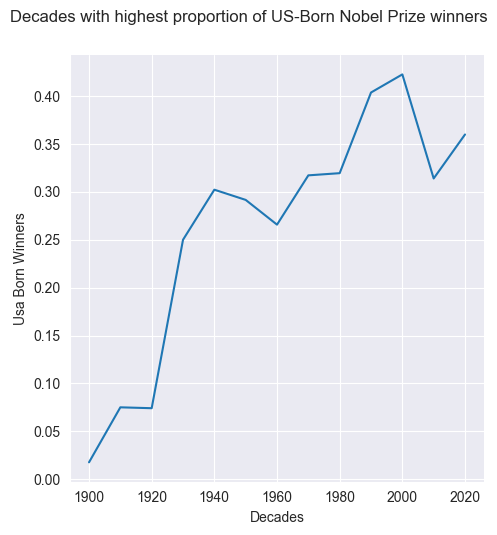

In [5]:
#Creating optional visualization for results
sns.set_style("darkgrid")
g=sns.relplot(x="decade",y="usa_born_winner", kind="line", data=prop_usa_winners)
g.figure.suptitle("Decades with highest proportion of US-Born Nobel Prize winners", y=1.06)
g.set(xlabel="Decades",ylabel="Usa Born Winners")
plt.show()

# Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [6]:
#Creating a column of indicators for the winners
df_nobel["female_winner"] = df_nobel["sex"] == "Female"

#Proportion of laureates by decade and category
prop_female_winners = df_nobel.groupby(["decade","category"], as_index=False)["female_winner"].mean()

#Decade and category with the highest proportion of laureates
max_female_row = prop_female_winners[prop_female_winners["female_winner"] == prop_female_winners["female_winner"].max()]
max_female_dict = {
    max_female_row["decade"].values[0]: max_female_row["category"].values[0]
}

print(f'The decade and Nobel Prize category with the highest proportion of female laureates is: {max_female_dict}')

The decade and Nobel Prize category with the highest proportion of female laureates is: {2020: 'Literature'}


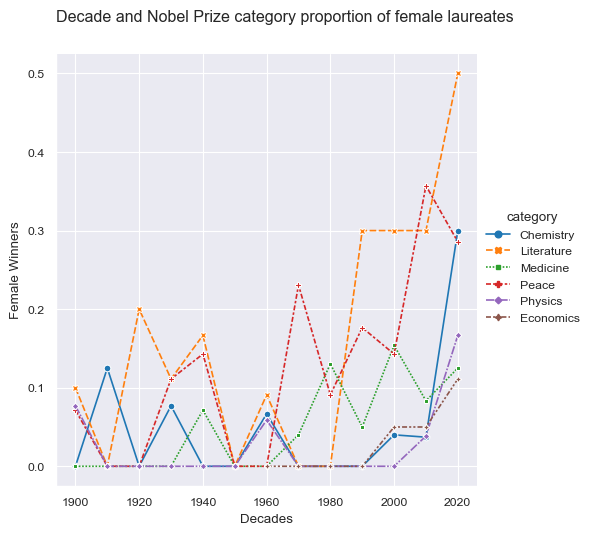

In [7]:
#Creating optional visualization for results
sns.set_style("darkgrid")
sns.set_context("paper")
g=sns.relplot(x="decade",y="female_winner", kind="line", data=prop_female_winners,hue="category",style="category",markers=True)
g.figure.suptitle("Decade and Nobel Prize category proportion of female laureates", y=1.06)
g.set(xlabel="Decades",ylabel="Female Winners")
plt.show()


# Who was the first woman to receive a Nobel Prize, and in what category?

In [10]:
#Creating filter for  new data frame female_winners
female_winners = df_nobel[df_nobel["female_winner"]]

#Find the first laureate and category
first_woman_row = female_winners[female_winners["year"] == female_winners["year"].min()]

first_woman_name = first_woman_row["full_name"].values[0]
first_woman_category = first_woman_row["category"].values[0]

print(f'The first woman laureate with nobel prize was : {first_woman_name}, in the category {first_woman_category}')


The first woman laureate with nobel prize was : Marie Curie, née Sklodowska, in the category Physics


# Which individuals or organizations have won more than one Nobel Prize throughout the years?